In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
ibov_em_real = pd.read_excel('/home/brenno/Documentos/videos_youtube/dados_youtube/ibovespa_em_real.xlsx', na_values="-")
ibov_em_dolar = pd.read_excel('/home/brenno/Documentos/videos_youtube/dados_youtube/ibovespa_em_dolar.xlsx', na_values="-")

ibov_em_real = ibov_em_real.set_index('Data').dropna()
ibov_em_real = ibov_em_real[ibov_em_real.index.year > 1994]
ibov_em_real = ibov_em_real.astype(float)

ibov_em_dolar = ibov_em_dolar.set_index('Data').dropna()
ibov_em_dolar = ibov_em_dolar.astype(float)

In [3]:
def puxando_3_maiores_quedas(df, periodo, moeda):

    if periodo == "diario":
      pass
    
    elif periodo == "mensal":

        df = df.resample('M').last()

    elif periodo == "anual":

        df = df.resample('Y').last()
    
    else:
        print('Digite um período válido')
        return    
    

    var_df = df.pct_change()

    tres_maiores_quedas = var_df.apply(lambda x: x.nsmallest(3))

    tres_maiores_quedas.columns = [f'Maiores Quedas {periodo} em {moeda}']


  
    return tres_maiores_quedas


In [4]:

maiores_quedas_diarias_em_real = puxando_3_maiores_quedas(df = ibov_em_real, periodo="diario", moeda= "real")
maiores_quedas_diarias_em_dolar = puxando_3_maiores_quedas(df = ibov_em_dolar, periodo="diario", moeda= "dolar")

maiores_quedas_diarias_em_real, maiores_quedas_diarias_em_dolar

#97 em real -> crise asiática e primeiro circuit breaker da história 
#98 em real -> Crise russa e governo eleva taxa selic de 29,75% para 49,75% ao ano pra tentar segurar dolares no Brasil
#20 em real -> covid
#CTA minicurso

(            Maiores Quedas diario em real
 Data                                     
 1998-09-10                      -0.158267
 1997-10-27                      -0.149762
 2020-03-12                      -0.147804,
             Maiores Quedas diario em dolar
 Data                                      
 1968-08-21                       -0.251515
 1983-02-21                       -0.241237
 1979-12-07                       -0.232783)

In [5]:
maiores_quedas_mensais_em_real = puxando_3_maiores_quedas(df = ibov_em_real, periodo="mensal", moeda= "real")
maiores_quedas_mensais_em_dolar = puxando_3_maiores_quedas(df = ibov_em_dolar, periodo="mensal", moeda= "dolar")

maiores_quedas_mensais_em_real, maiores_quedas_mensais_em_dolar

#março 1990 -> mes do confisco do color, ibovespa caiu 21% no dia do confisco, economia indo pro saco com anuncio do plano color. Foi traumatico nao só pra poupança. 
#junho 1989 -> quebra da bolsa do RJ

(            Maiores Quedas mensal em real
 Data                                     
 1998-08-31                      -0.395536
 2020-03-31                      -0.299043
 2008-10-31                      -0.247976,
             Maiores Quedas mensal em dolar
 Data                                      
 1990-03-31                       -0.694913
 1989-06-30                       -0.558120
 1998-08-31                       -0.402469)

In [6]:
maiores_quedas_anual_em_real = puxando_3_maiores_quedas(df = ibov_em_real, periodo="anual", moeda= "real")
maiores_quedas_anual_em_dolar = puxando_3_maiores_quedas(df = ibov_em_real, periodo="anual", moeda= "dolar")

maiores_quedas_anual_em_real, maiores_quedas_anual_em_dolar

(            Maiores Quedas anual em real
 Data                                    
 2008-12-31                     -0.412234
 1998-12-31                     -0.334641
 2011-12-31                     -0.181086,
             Maiores Quedas anual em dolar
 Data                                     
 2008-12-31                      -0.412234
 1998-12-31                      -0.334641
 2011-12-31                      -0.181086)

<AxesSubplot:xlabel='Data'>

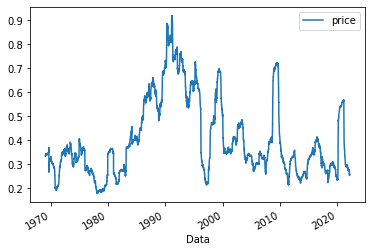

In [7]:
#volatlidade do ibov ao longo do tempo

vol = ibov_em_dolar.pct_change().rolling(252).std()*(252**0.5)
vol.plot()

In [ ]:
#Querem um vídeo sobre as maiores altas? Posso fazer